In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
warnings.filterwarnings("ignore")
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

In [2]:
adult_df = pd.read_csv("성인인구소득.csv")
adult_df[:5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
adult_df.shape

(32561, 15)

In [5]:
adult_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [6]:
adult_df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

In [7]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
num_column = ["age", "fnlwgt", "education.num", "capital.gain", "capital.loss", "hours.per.week"]
cat_column = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']
target = ["income"]

x_num_column = adult_df.loc[:, adult_df.columns.isin(num_column)]
x_cat_column = adult_df.loc[:, adult_df.columns.isin(cat_column)]
x = adult_df.loc[:, (adult_df.columns.isin(num_column) | adult_df.columns.isin(cat_column))]
y = adult_df["income"]

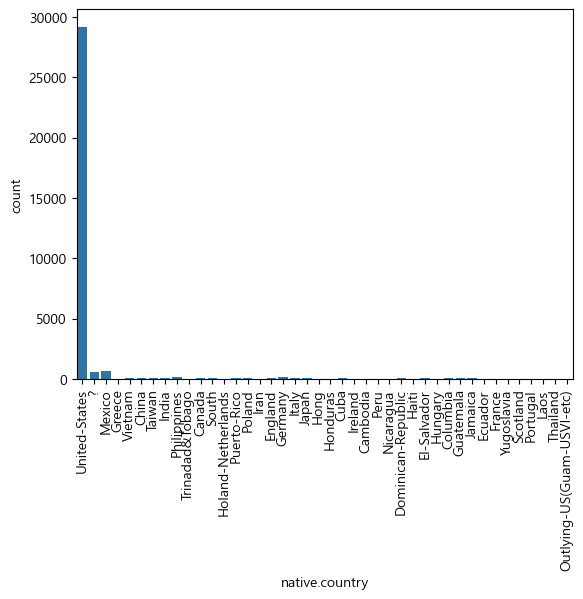

In [9]:
sns.countplot(x="native.country", data=adult_df)
plt.xticks(rotation=90)
plt.show()

In [10]:
adult_df.drop("native.country", axis=1, inplace=True)

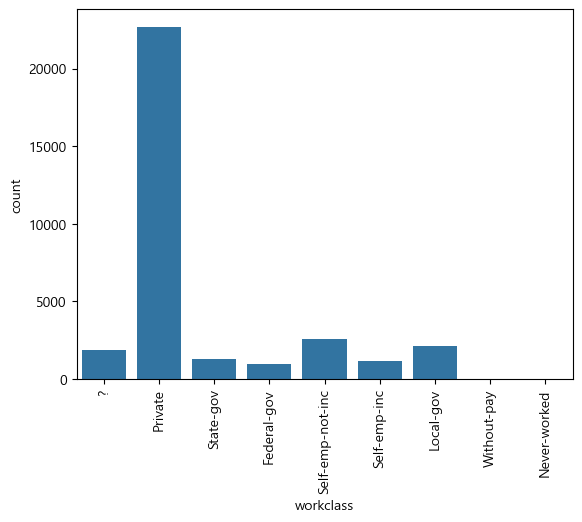

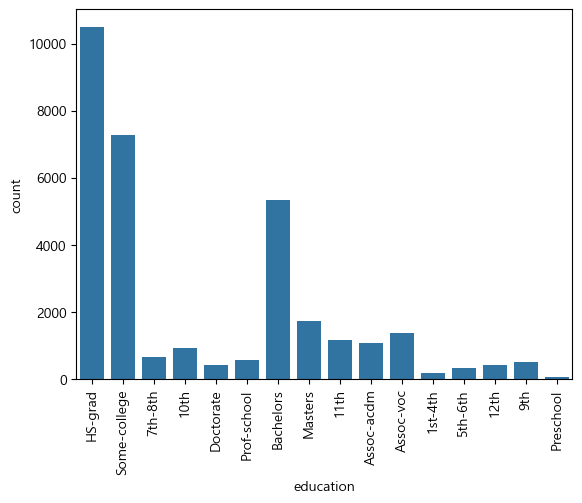

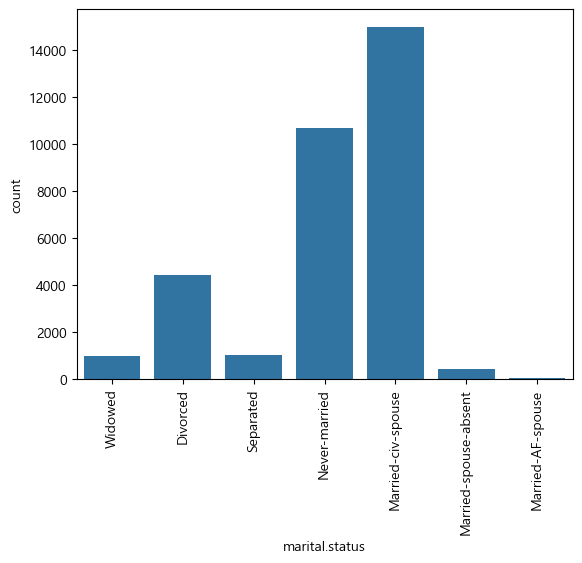

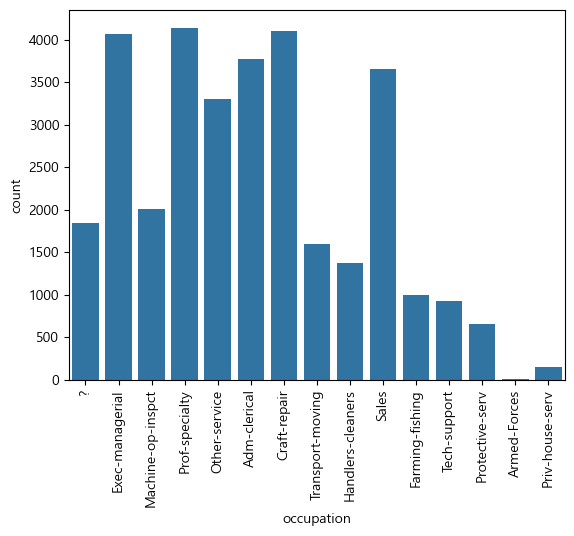

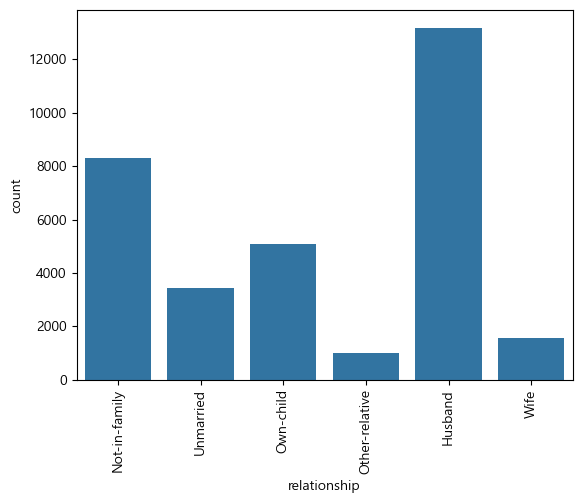

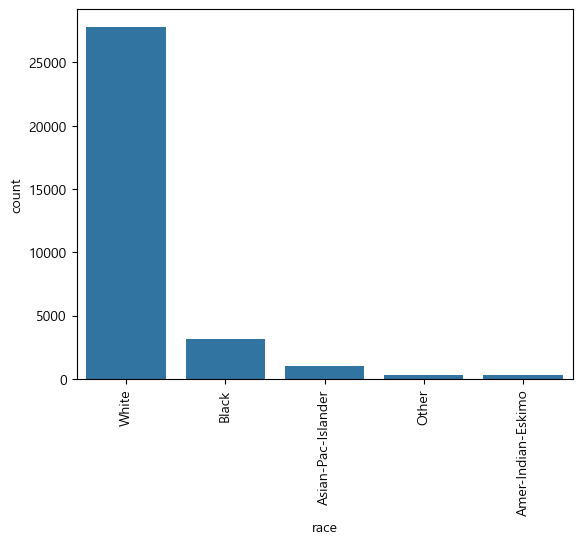

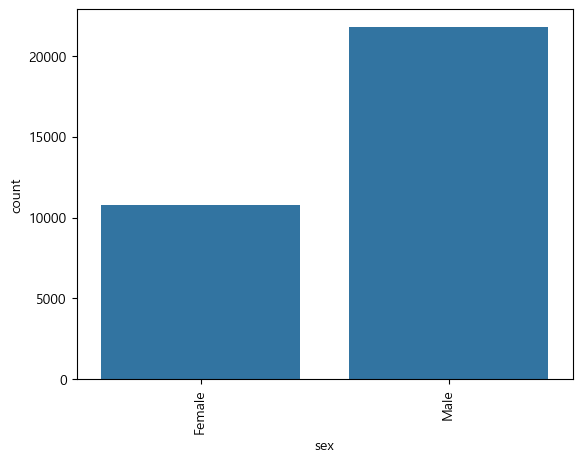

In [11]:
for col in cat_column:
    sns.countplot(x=col, data=adult_df)
    plt.xticks(rotation=90)
    plt.show()

In [12]:
print(len(adult_df[adult_df["occupation"] == "?"]))

print(len(adult_df[adult_df["workclass"] == "?"]))

1843
1836


<Axes: >

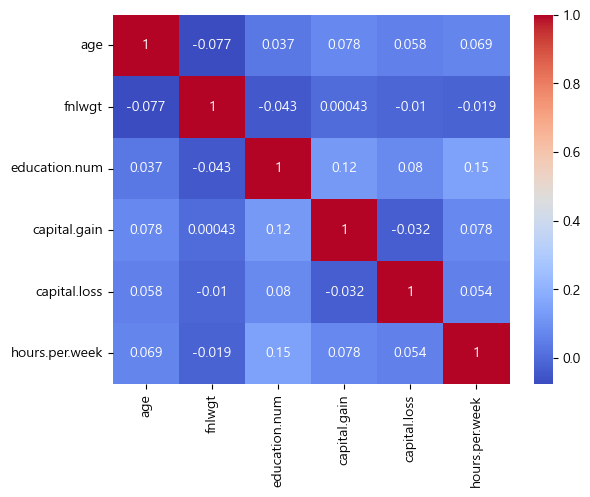

In [13]:
# 수치형 다중공선성
sns.heatmap(x_num_column.corr(), annot=True, cmap="coolwarm")

In [14]:
# 범주형 다중공선성
import scipy.stats as stats
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

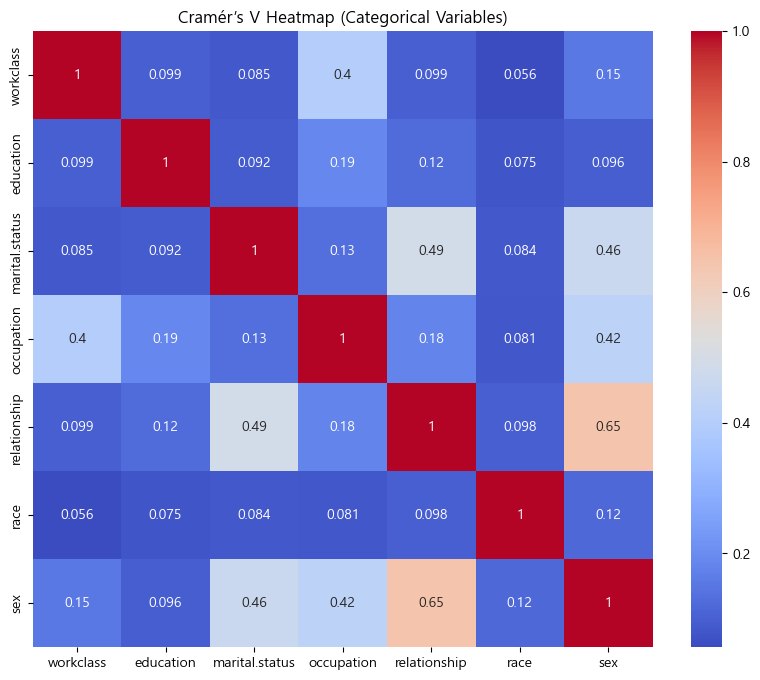

In [15]:
cramers_results = pd.DataFrame(index=cat_column, columns=cat_column)

for var1 in cat_column:
    for var2 in cat_column:
        if var1 == var2:
            cramers_results.loc[var1, var2] = 1.0
        else:
            cramers_results.loc[var1, var2] = cramers_v(adult_df[var1], adult_df[var2])

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm')
plt.title("Cramér’s V Heatmap (Categorical Variables)")
plt.show()

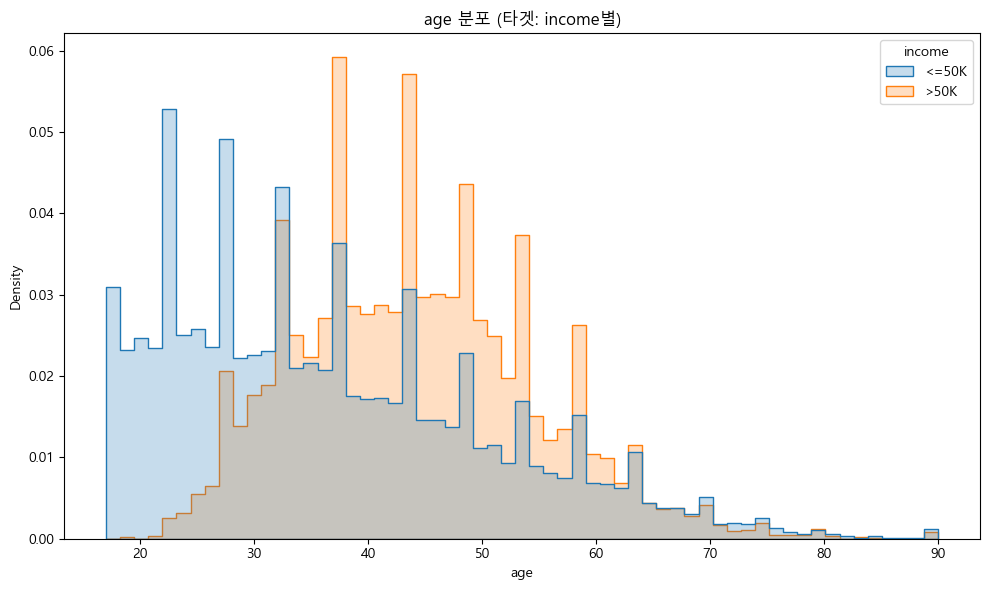

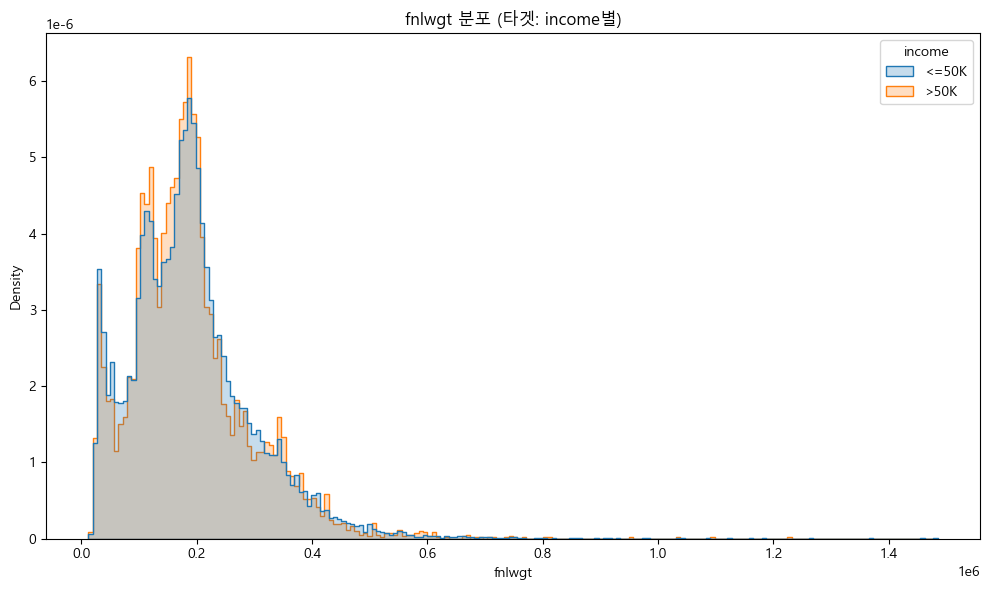

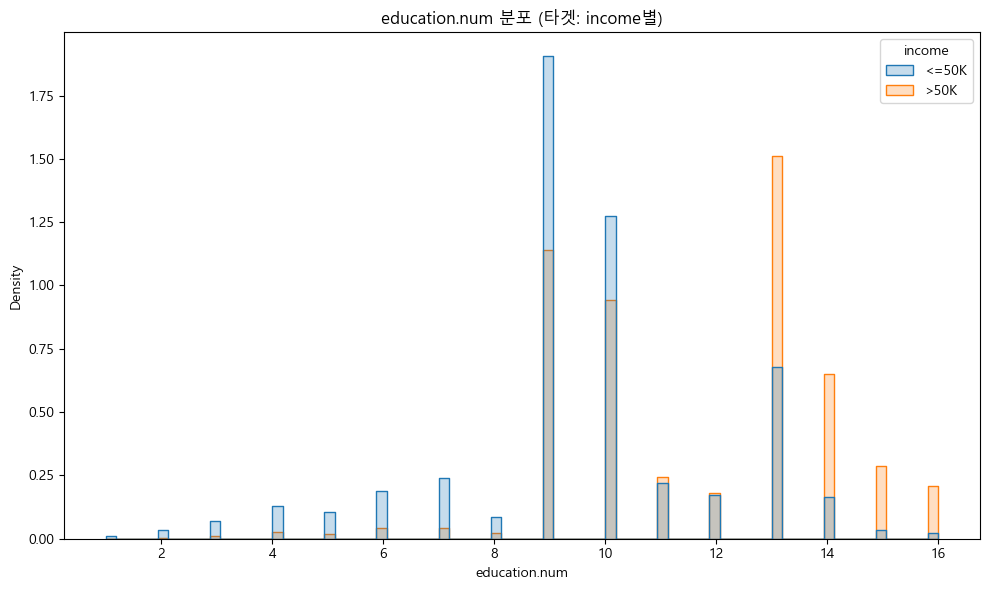

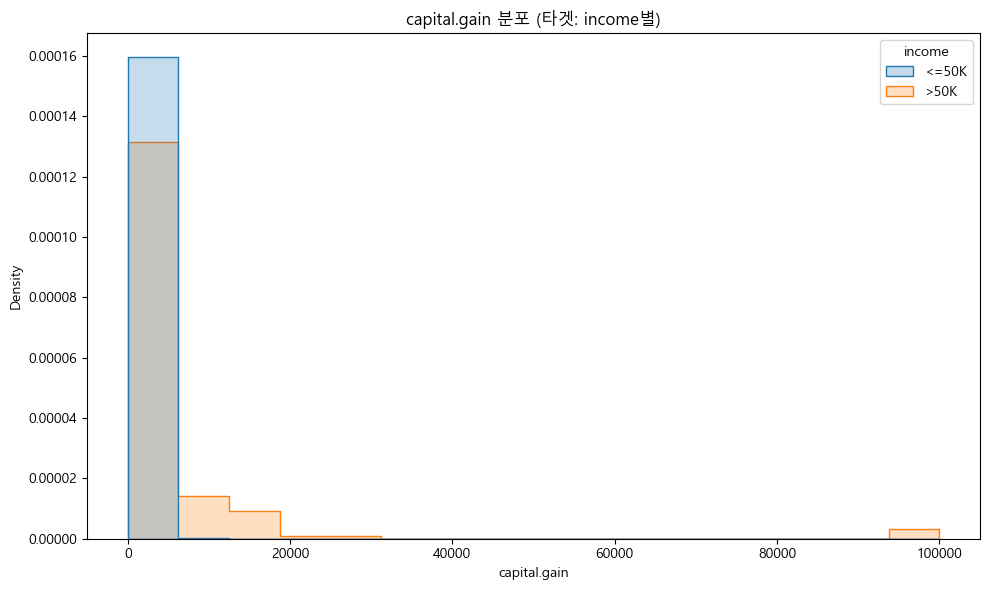

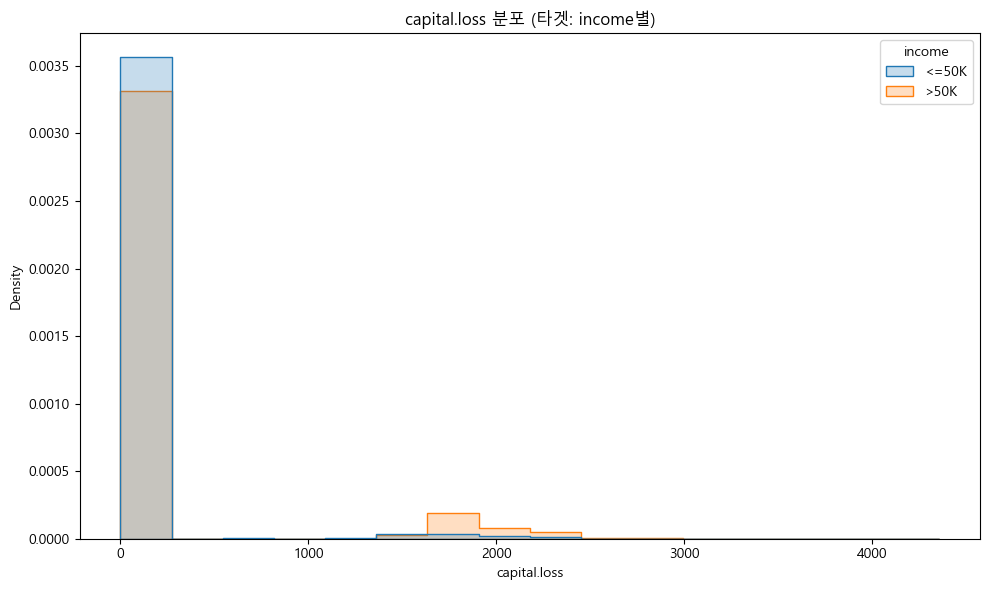

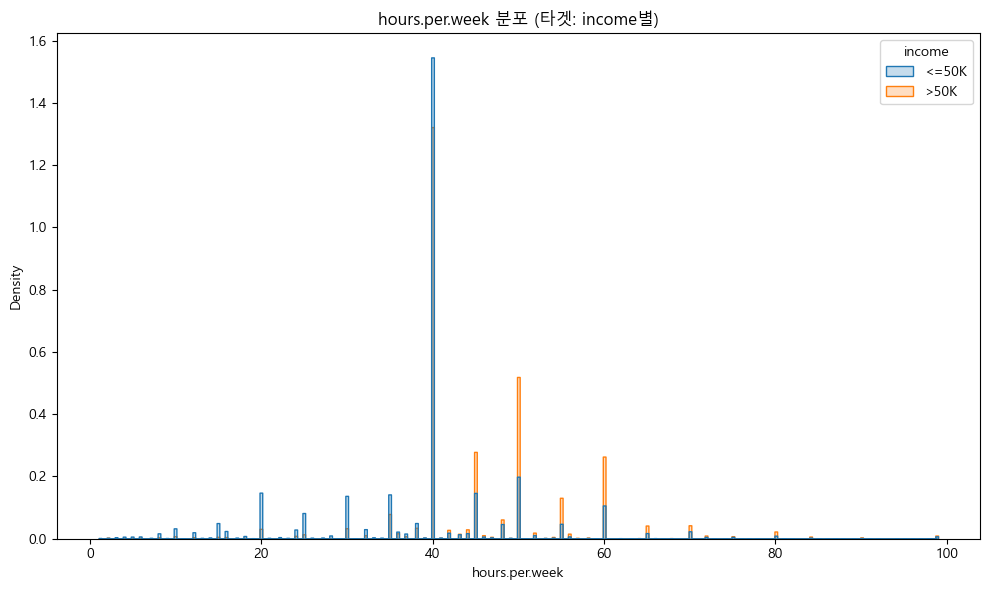

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_num_feature_by_target(df, num_column_name, target_column="income"):
    if num_column_name not in df.columns:
        return

    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=num_column_name, hue=target_column, element="step", stat="density", common_norm=False)
    plt.title(f"{num_column_name} 분포 (타겟: {target_column}별)")
    plt.tight_layout()
    plt.show()

plot_num_feature_by_target(adult_df, "age")
plot_num_feature_by_target(adult_df, "fnlwgt")
plot_num_feature_by_target(adult_df, "education.num")
plot_num_feature_by_target(adult_df, "capital.gain")
plot_num_feature_by_target(adult_df, "capital.loss")
plot_num_feature_by_target(adult_df, "hours.per.week")

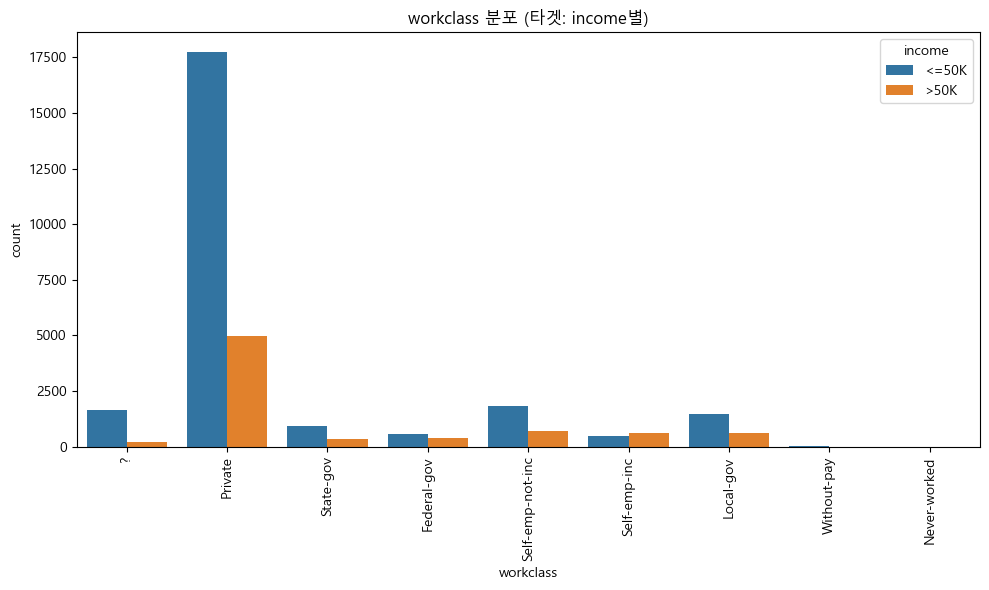

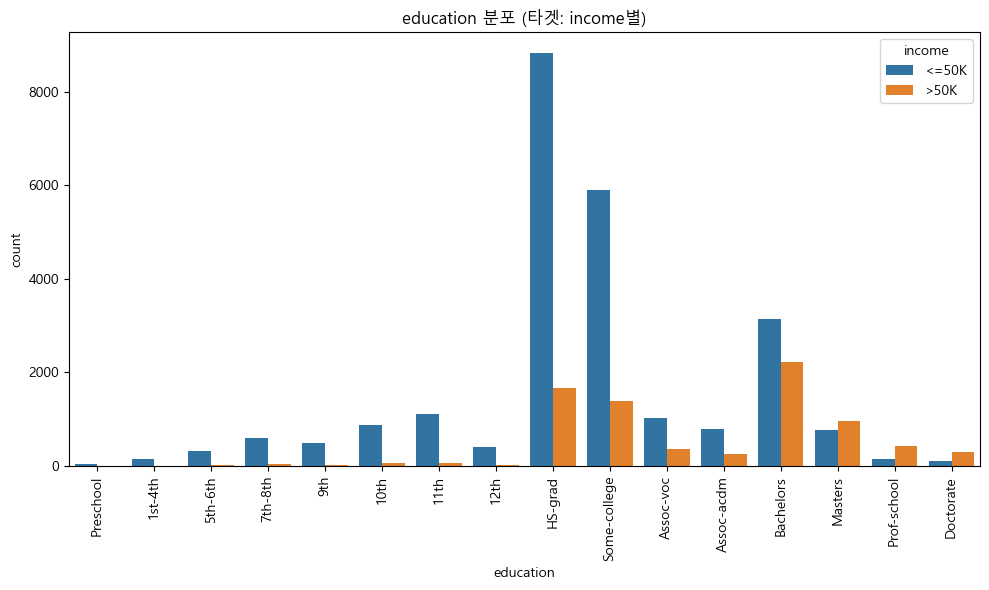

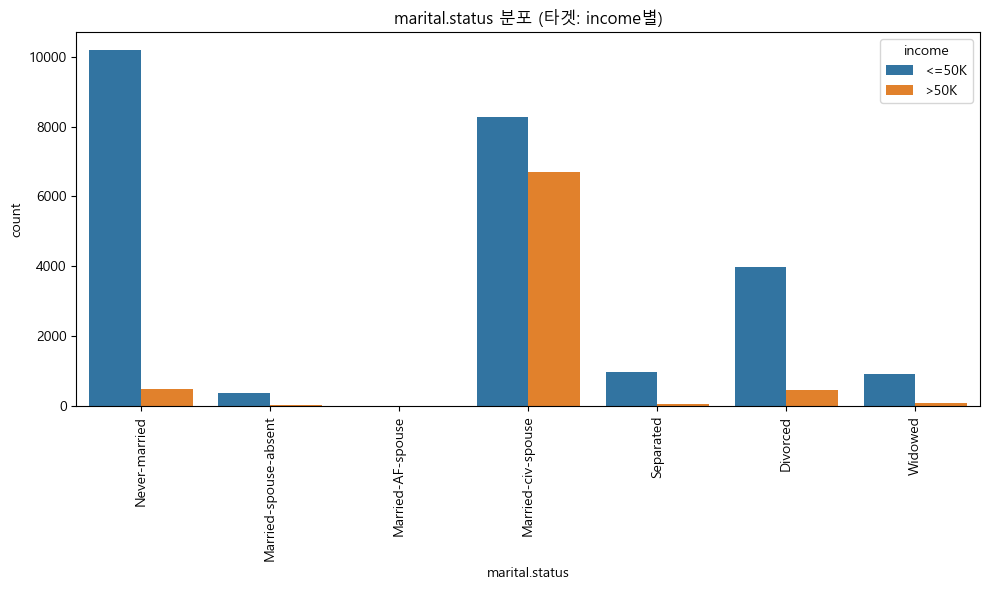

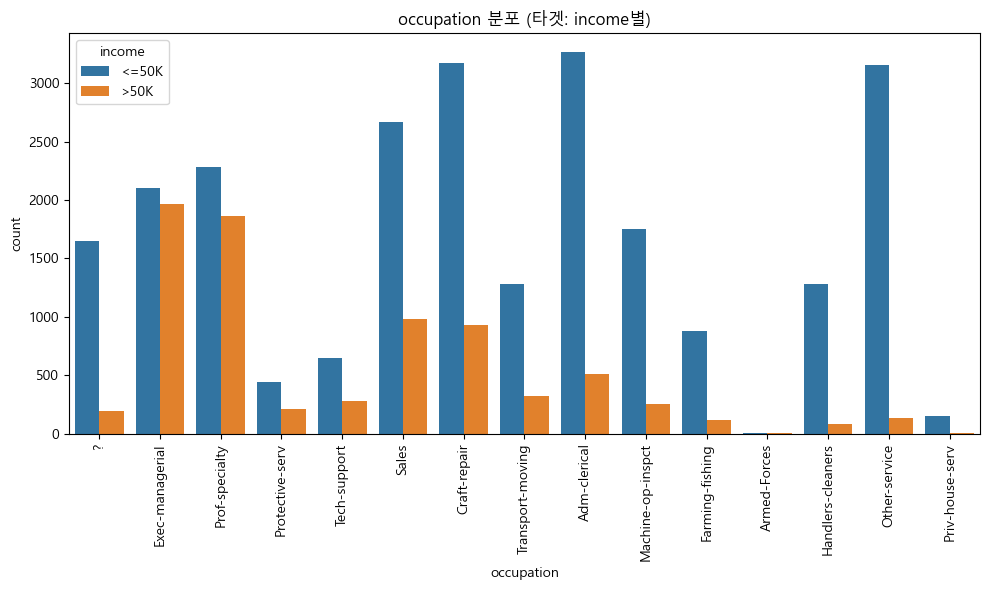

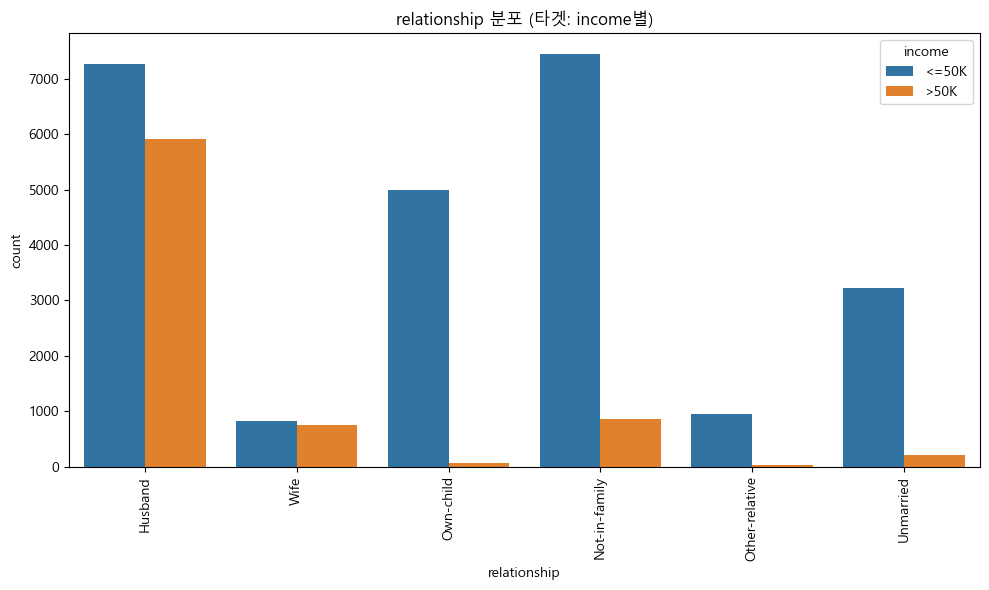

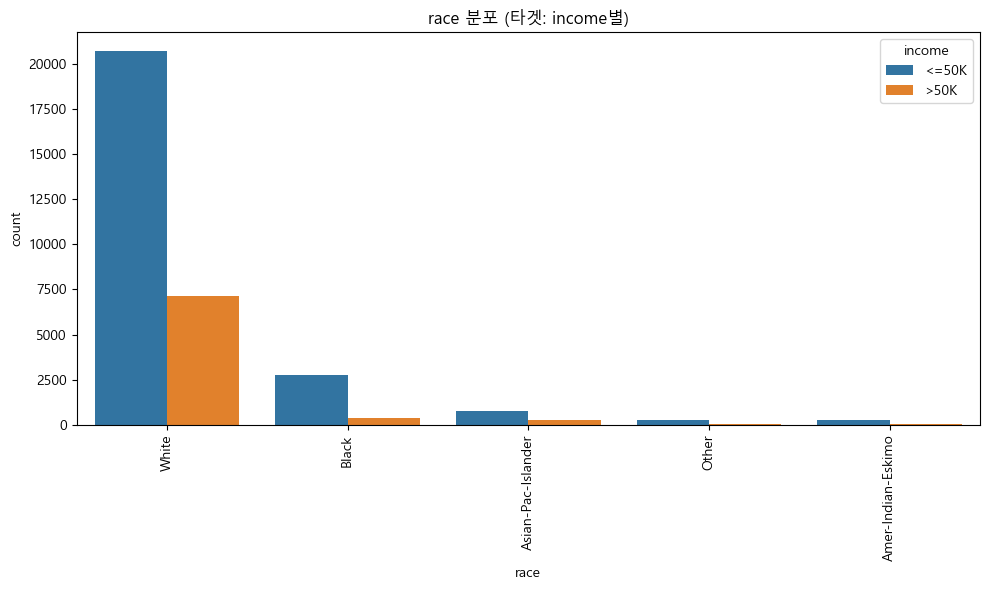

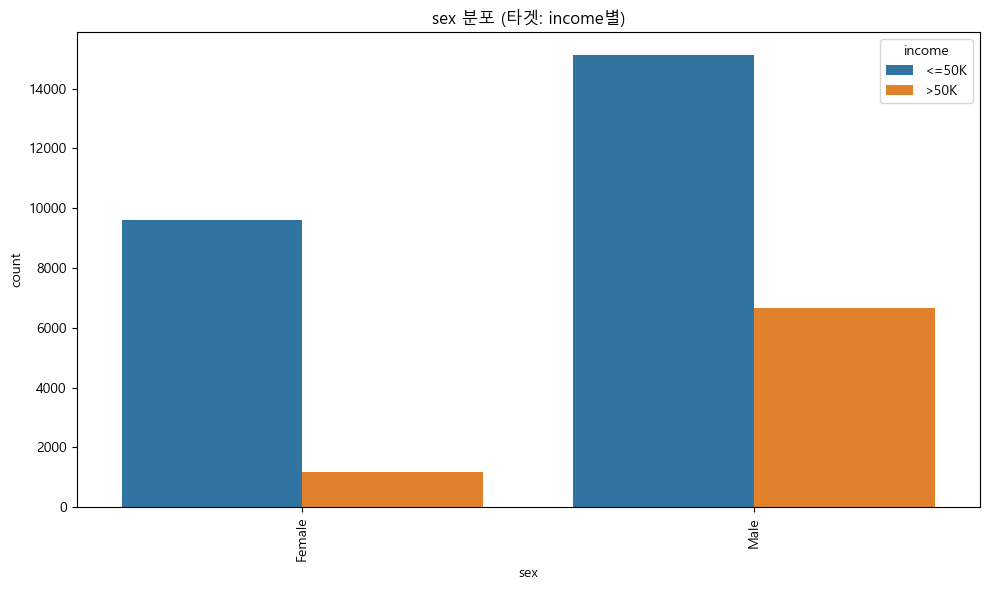

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cat_feature_by_target(df, cat_column_name, order=None, target_column="income"):
    if cat_column_name not in df.columns:
        return

    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=cat_column_name, hue=target_column, order=order)
    plt.xticks(rotation=90)
    plt.title(f"{cat_column_name} 분포 (타겟: {target_column}별)")
    plt.tight_layout()
    plt.show()

plot_cat_feature_by_target(adult_df, "workclass")
plot_cat_feature_by_target(adult_df, "education", ["Preschool", "1st-4th", "5th-6th", "7th-8th", "9th", "10th", "11th", "12th", "HS-grad", "Some-college", "Assoc-voc", "Assoc-acdm", "Bachelors", "Masters", "Prof-school", "Doctorate"])
plot_cat_feature_by_target(adult_df, "marital.status", ["Never-married","Married-spouse-absent","Married-AF-spouse","Married-civ-spouse","Separated","Divorced","Widowed"])
plot_cat_feature_by_target(adult_df, "occupation", ["?", "Exec-managerial", "Prof-specialty", "Protective-serv", "Tech-support", "Sales", "Craft-repair", "Transport-moving", "Adm-clerical", "Machine-op-inspct", "Farming-fishing", "Armed-Forces", "Handlers-cleaners", "Other-service", "Priv-house-serv"])
plot_cat_feature_by_target(adult_df, "relationship", ['Husband', 'Wife', 'Own-child', 'Not-in-family', 'Other-relative', 'Unmarried'])
plot_cat_feature_by_target(adult_df, "race")
plot_cat_feature_by_target(adult_df, "sex")

In [18]:
print(adult_df[num_column].skew())      # 비대칭성
print(adult_df[num_column].kurtosis())  # 뾰족함

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64
age                -0.166127
fnlwgt              6.218811
education.num       0.623444
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916687
dtype: float64


In [19]:
# capital.gain과 capital.loss는 왜도와 첨도가 너무 커서 제외
# fnlwgt의 왜도를 보정
adult_df.drop(["capital.gain", "capital.loss"], axis=1, inplace=True)
num_column.remove("capital.gain")
num_column.remove("capital.loss")
adult_df['fnlwgt'] = np.log1p(adult_df['fnlwgt'])


In [20]:
print(adult_df[num_column].skew())      # 비대칭성
print(adult_df[num_column].kurtosis())  # 뾰족함

age               0.558743
fnlwgt           -0.842461
education.num    -0.311676
hours.per.week    0.227643
dtype: float64
age              -0.166127
fnlwgt            0.831260
education.num     0.623444
hours.per.week    2.916687
dtype: float64


In [21]:
adult_df.to_csv("성인인구소득_refined.csv")